In [3]:
%matplotlib inline

In [5]:
import mne 
import os
import numpy as np


In [7]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif')

In [8]:
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file /Users/au194693/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [12]:
raw.info

<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 GRAD, 102 MAG, 9 STIM, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>

In [13]:
raw.pick_types(meg=False, eeg=True, stim=True)

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


<Raw | sample_audvis_filt-0-40_raw.fif, 68 x 41700 (277.7 s), ~2.9 MB, data not loaded>

In [14]:
raw.pick_types(meg=False, eeg=True, stim=True)

<Raw | sample_audvis_filt-0-40_raw.fif, 68 x 41700 (277.7 s), ~2.9 MB, data not loaded>

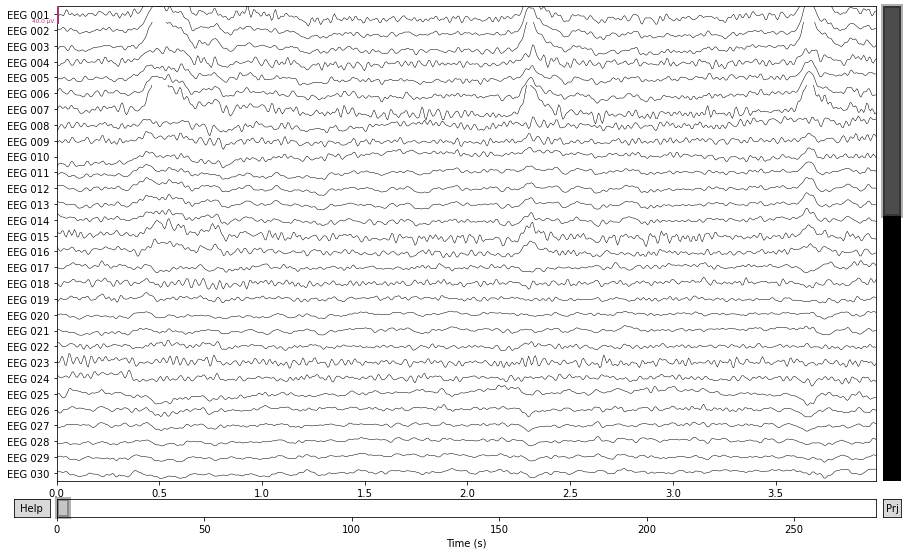

In [16]:
raw.plot(duration=4, n_channels=30);


In [17]:
# filter your data

In [ ]:
# highpass: 0.1 | 0.5 Hz
# lowpass: 40Hz


Fitting ICA to data using 59 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 1.6s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


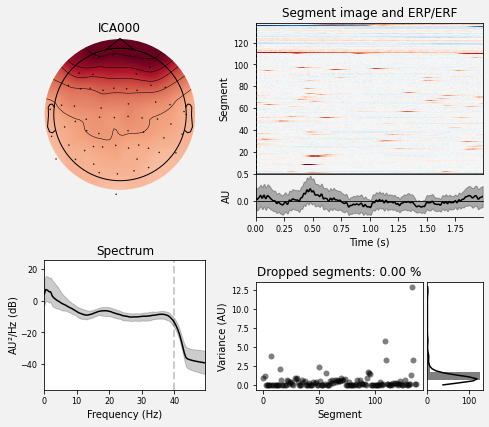

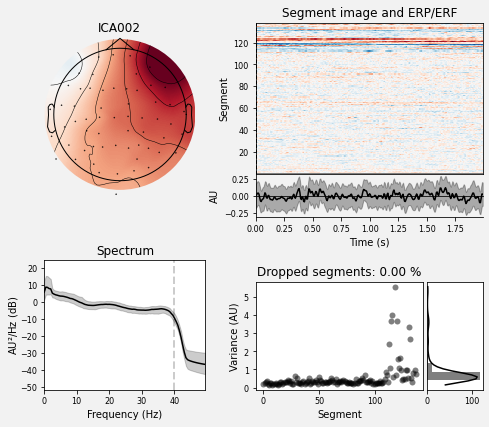

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [22]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [0, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

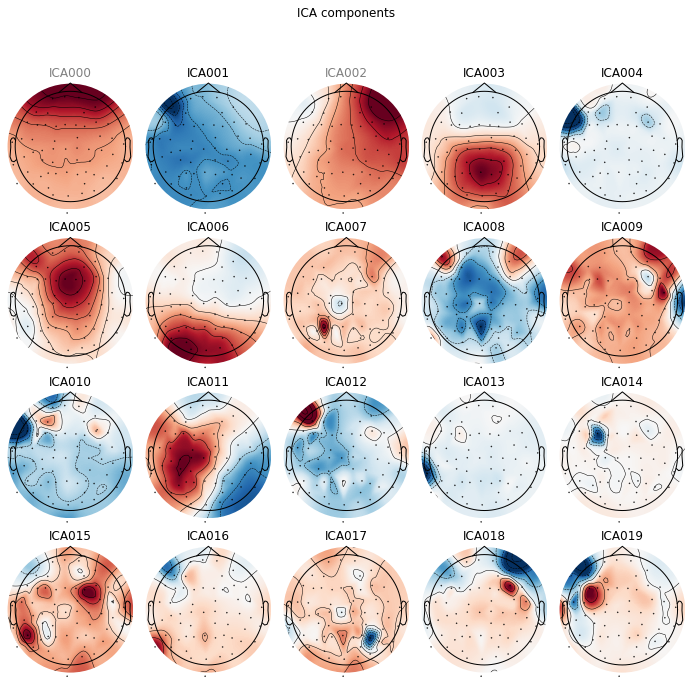

[<MNEFigure size 702x696.24 with 20 Axes>]

In [25]:
ica.plot_components()

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 59 PCA components


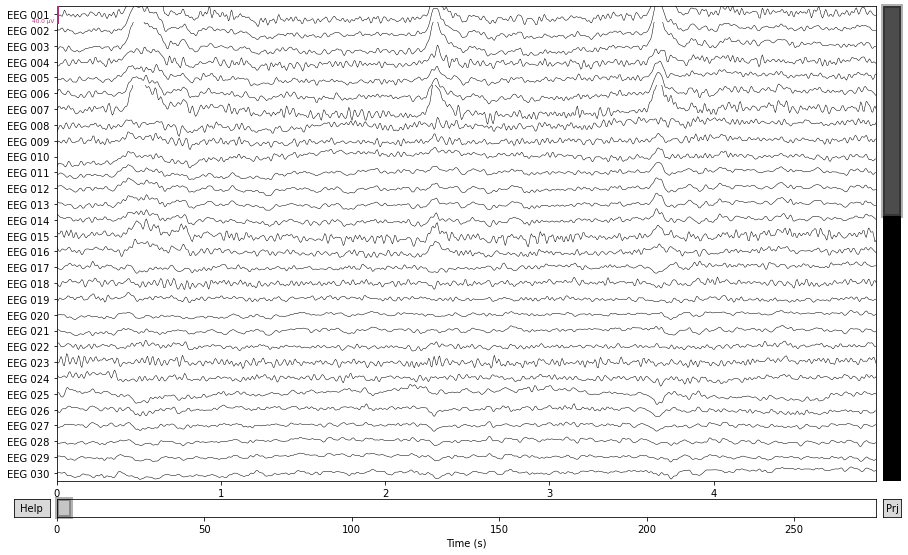

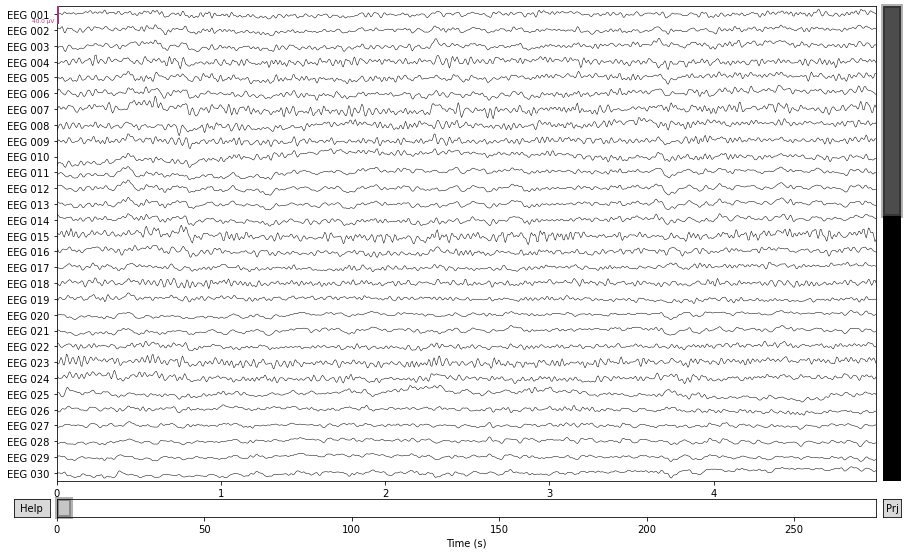

In [26]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

orig_raw.plot(duration=5, n_channels=30);
raw.plot(duration=5, n_channels=30);

In [31]:
events = mne.find_events(raw, stim_channel='STI 014')

319 events found
Event IDs: [ 1  2  3  4  5 32]


In [32]:
events

array([[ 6994,     0,     2],
       [ 7086,     0,     3],
       [ 7192,     0,     1],
       [ 7304,     0,     4],
       [ 7413,     0,     2],
       [ 7506,     0,     3],
       [ 7612,     0,     1],
       [ 7709,     0,     4],
       [ 7810,     0,     2],
       [ 7916,     0,     3],
       [ 8025,     0,     1],
       [ 8129,     0,     4],
       [ 8233,     0,     2],
       [ 8331,     0,     3],
       [ 8428,     0,     1],
       [ 8522,     0,     5],
       [ 8633,     0,     2],
       [ 8662,     0,    32],
       [ 8739,     0,     3],
       [ 8857,     0,     1],
       [ 8962,     0,     4],
       [ 9052,     0,     2],
       [ 9144,     0,     3],
       [ 9251,     0,     1],
       [ 9365,     0,     4],
       [ 9477,     0,     2],
       [ 9581,     0,     3],
       [ 9677,     0,     1],
       [ 9782,     0,     4],
       [ 9890,     0,     2],
       [ 9981,     0,     3],
       [10101,     0,     1],
       [10220,     0,     4],
       [10

In [33]:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'smiley': 5, 'buttonpress': 32}

In [34]:
event_dict

{'auditory/left': 1,
 'auditory/right': 2,
 'visual/left': 3,
 'visual/right': 4,
 'smiley': 5,
 'buttonpress': 32}

In [37]:
reject_criteria = dict(eeg=150e-6)  # 150 µV


In [38]:
epochs = mne.Epochs(raw,
                    events,
                    event_id=event_dict,
                    tmin=-0.2,
                    tmax=0.5,
                    reject=reject_criteria,
                    preload=True)

Not setting metadata
Not setting metadata
319 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 319 events and 106 original time points ...
    Rejecting  epoch based on EEG : ['EEG 008']
1 bad epochs dropped


In [39]:
epochs.info

<Info | 14 non-empty values
 bads: []
 ch_names: STI 001, STI 002, STI 003, STI 004, STI 005, STI 006, STI 014, ...
 chs: 9 STIM, 59 EEG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 68
 projs: Average EEG reference: on
 sfreq: 150.2 Hz
>

In [40]:
epochs

Number of events,318
Events,auditory/left: 72auditory/right: 73buttonpress: 16smiley: 14visual/left: 73visual/right: 70
Time range,-0.200 – 0.499 sec
Baseline,-0.200 – 0.000 sec


In [41]:
conds_we_care_about = ['auditory/left', 'auditory/right',
                       'visual/left', 'visual/right']

In [42]:
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place
aud_epochs = epochs['auditory']
vis_epochs = epochs['visual']
del raw, epochs  # free up memory

Dropped 8 epochs: 0, 1, 14, 16, 18, 35, 101, 231


In [44]:
aud_epochs

Number of events,140
Events,auditory/left: 70auditory/right: 70
Time range,-0.200 – 0.499 sec
Baseline,-0.200 – 0.000 sec


Not setting metadata
Not setting metadata
140 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


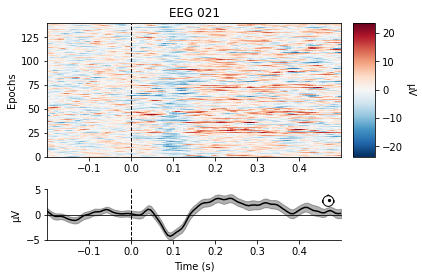

[<Figure size 432x288 with 4 Axes>]

In [49]:
aud_epochs.plot_image(picks=['EEG 021'])

In [51]:
aud_evoked = aud_epochs.average()

In [60]:
vis_evoked = vis_epochs.average()

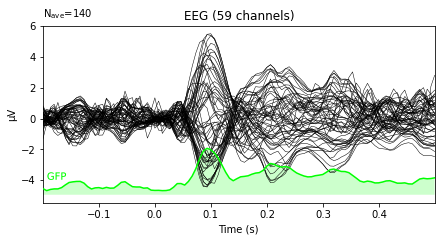

In [58]:
aud_evoked.plot(gfp=True);

Projections have already been applied. Setting proj attribute to True.


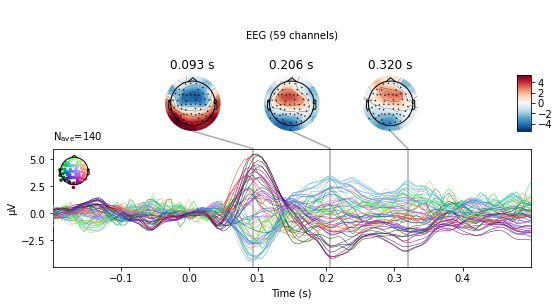

In [59]:
aud_evoked.plot_joint();

Projections have already been applied. Setting proj attribute to True.


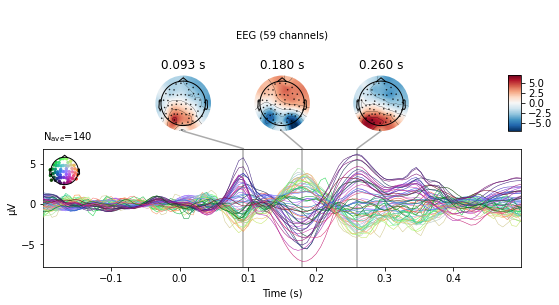

In [62]:
vis_evoked.plot_joint();

In [63]:
vis_evoked.data

array([[-7.31766119e-07, -7.85820041e-07, -6.73523747e-07, ...,
        -9.16319123e-07, -8.37856734e-07, -1.17901480e-06],
       [-1.37732826e-06, -1.16396846e-06, -7.68569068e-07, ...,
        -1.35350257e-06, -1.59332111e-06, -1.41205122e-06],
       [-1.21288654e-06, -8.06679980e-07, -8.16490972e-07, ...,
        -1.64281089e-06, -2.00663815e-06, -2.17557337e-06],
       ...,
       [ 5.65028244e-07,  5.40962989e-07,  5.86826344e-07, ...,
         3.16807395e-06,  3.25403711e-06,  3.19860644e-06],
       [ 5.51655595e-07,  4.45413540e-07,  4.33566893e-07, ...,
         2.05647007e-06,  2.30240897e-06,  2.43759515e-06],
       [ 2.19465741e-07,  7.64004987e-08,  1.79381456e-07, ...,
         1.41987838e-06,  1.59509902e-06,  1.60639743e-06]])

In [64]:
vis_evoked.get_peak()

('EEG 056', 0.17981569184254909)

In [65]:
vis_evoked.get_peak?

In [67]:
dir(aud_epochs)

['__class__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bad_dropped',
 '_channel_type_idx',
 '_check_consistency',
 '_check_metadata',
 '_compute_aggregate',
 '_current',
 '_data',
 '_decim',
 '_decim_slice',
 '_detrend_offset_decim',
 '_detrend_picks',
 '_do_baseline',
 '_do_delayed_proj',
 '_evoked_from_epoch_data',
 '_filename',
 '_get_channel_positions',
 '_get_data',
 '_get_epoch_from_raw',
 '_getitem',
 '_is_good_epoch',
 '_item_to_select',
 '_keys_to_idx',
 '_metadata',
 '_name',
 '_offset',
 '_pick_drop_channels',
 '_pick_projs',
 '_project_epoch',
 '_projector',
 '_raw',
 '_raw_t

In [69]:
aud_epochs._data.shape

(140, 68, 106)

In [70]:
#epochs x channels x time

In [71]:
vis_evoked.data.shape

(59, 106)

In [ ]:
# channels x time